<span style="color:red; font-family:Helvetica Neue, Helvetica, Arial, sans-serif; font-size:2em;">An Exception was encountered at '<a href="#papermill-error-cell">In [20]</a>'.</span>

In [1]:
import pfp_api_client
from pfp_api_client.pfp.calculators.ase_calculator import ASECalculator
from pfp_api_client.pfp.estimator import Estimator, EstimatorCalcMode


print(f"pfp_api_client: {pfp_api_client.__version__}")

from pfp_api_client.pfp.estimator import Estimator, EstimatorMethodType
pfvm_estimator = Estimator(method_type=EstimatorMethodType.PFVM)
calculator = ASECalculator(pfvm_estimator)
def get_opt_energy(atoms, fmax=0.4, opt_mode: str = "normal"):    
    atoms.set_calculator(calculator)
    if opt_mode == "scale":
        opt1 = LBFGS(StrainFilter(atoms, mask=[1, 1, 1, 0, 0, 0]))
    elif opt_mode == "all":
        opt1 = LBFGS(ExpCellFilter(atoms))
    else:
        opt1 = LBFGS(atoms)
    opt1.run(fmax=fmax)
    return atoms.get_total_energy()

/home/jovyan/.py38/lib/python3.8/site-packages/pfp_api_client/__init__.py:35: UserWarning: New version of pfp-api-client is available. Please consider upgrading by `pip install -U pfp-api-client`.
  warnings.warn(


pfp_api_client: 1.13.1


In [2]:
from ase.cluster import Decahedron, Icosahedron, Octahedron, wulff_construction
from ase import Atoms 
from ase.io import Trajectory
import pandas as pd
from ase.build import bulk
from ase.constraints import ExpCellFilter, StrainFilter
from ase.optimize import LBFGS
import numpy as np

In [3]:
atoms_bulk = bulk("Pt", "fcc", a=3.8, cubic=True)
atoms_bulk.calc = calculator
opt = LBFGS(ExpCellFilter(atoms_bulk, hydrostatic_strain=True))
opt.run()
a = np.mean(np.diag(atoms_bulk.cell))
print(f"cell={atoms_bulk.cell}, a={a}")

       Step     Time          Energy         fmax
*Force-consistent energies used in optimization.
LBFGS:    0 07:13:45      -20.954257*      15.5499
LBFGS:    1 07:13:45      -15.650194*      19.6242
LBFGS:    2 07:13:45      -21.138003*      10.4588
LBFGS:    3 07:13:45      -17.963146*      36.7822
LBFGS:    4 07:13:45      -21.789169*       4.4813
LBFGS:    5 07:13:45      -21.887325*       1.5534
LBFGS:    6 07:13:45      -21.900024*       0.0743
LBFGS:    7 07:13:45      -21.900055*       0.0005
cell=Cell([3.9709670177479337, 3.9709670177479337, 3.9709670177479337]), a=3.9709670177479333


In [4]:
from ase.cluster import wulff_construction
from ase import Atoms

def cluster2atoms(cluster):
    return Atoms(cluster.symbols, cluster.positions, cell=cluster.cell)

surfaces = [(1, 0, 0), (1, 1, 0), (1, 1, 1)]
esurf = [1.856, 1.681, 1.488]
lc = a
sizes = [85, 273, 579, 861]

nanoparticles = []
E_Pt_NP=[]
NP_list=[]
'''
for size in sizes:
    Pt_NP = wulff_construction("Pt", surfaces, esurf, size, "fcc", rounding="above", latticeconstant=lc)
    print(f"# atoms target={size}, actual {len(Pt_NP)}")
    nanoparticles.append(cluster2atoms(Pt_NP))
    Pt_NP.calc = calculator
    E_Pt_NP.append(get_opt_energy(Pt_NP))
    NP_list.append(Pt_NP)
'''

'\nfor size in sizes:\n    Pt_NP = wulff_construction("Pt", surfaces, esurf, size, "fcc", rounding="above", latticeconstant=lc)\n    print(f"# atoms target={size}, actual {len(Pt_NP)}")\n    nanoparticles.append(cluster2atoms(Pt_NP))\n    Pt_NP.calc = calculator\n    E_Pt_NP.append(get_opt_energy(Pt_NP))\n    NP_list.append(Pt_NP)\n'

In [5]:
size=200
Pt_3nm = wulff_construction("Pt", surfaces, esurf, size, "fcc", rounding="above", latticeconstant=lc)
print(f"# atoms target={size}, actual {len(Pt_3nm)}")
Pt_3nm.calc = calculator
E_Pt_3nm=get_opt_energy(Pt_3nm)
Pt_3nm


# atoms target=200, actual 201
       Step     Time          Energy         fmax
*Force-consistent energies used in optimization.
LBFGS:    0 07:13:47     -964.961245*       1.4873
LBFGS:    1 07:13:47     -966.186543*       1.3836
LBFGS:    2 07:13:47     -972.926722*       1.0910
LBFGS:    3 07:13:47     -973.811518*       1.1521
LBFGS:    4 07:13:47     -975.303548*       0.6557
LBFGS:    5 07:13:47     -975.869393*       0.9377
LBFGS:    6 07:13:47     -976.144298*       0.8140
LBFGS:    7 07:13:48     -976.425831*       0.4587
LBFGS:    8 07:13:48     -976.583747*       0.4679
LBFGS:    9 07:13:48     -976.722756*       0.4068
LBFGS:   10 07:13:48     -976.836194*       0.3003


Cluster(symbols='Pt201', pbc=False, calculator=ASECalculator(...))

In [40]:
from ase import Atoms
from ase.build import fcc111, add_adsorbate, bulk
from ase.io import read, write
from PIL import Image
from IPython.display import display
from ase.io.proteindatabank import write_proteindatabank, read_proteindatabank

def render_and_display_np(structure, index, max_size=(100, 100)):
    if len(structure) == 0:
        print(f"Warning: Structure at index {index} is empty. Skipping visualization.")
        return
    renderer = write('{index}.pov', structure, rotation='10z,-75x')
    renderer.render()
    image_path = '{index}.png'
    img = Image.open(image_path)
    img.thumbnail(max_size, Image.LANCZOS)
    
    display(img)

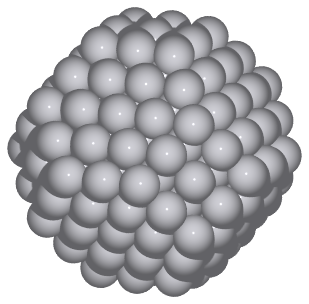

In [7]:
render_and_display_np(Pt_3nm,'./output/ini',(1000, 1000))
write_proteindatabank('./NP.pdb',Pt_3nm)

       Step     Time          Energy         fmax
*Force-consistent energies used in optimization.
LBFGS:    0 07:13:55     -567.101814*       2.2294
LBFGS:    1 07:13:55     -569.627401*       2.1071
LBFGS:    2 07:13:55     -580.459395*       1.9383
LBFGS:    3 07:13:55     -582.901582*       4.1670
LBFGS:    4 07:13:55     -584.742710*       1.8520
LBFGS:    5 07:13:55     -588.320692*       1.3529
LBFGS:    6 07:13:55     -589.097199*       1.2540
LBFGS:    7 07:13:55     -590.254706*       1.2037
LBFGS:    8 07:13:55     -590.944494*       0.8610
LBFGS:    9 07:13:55     -591.412420*       0.8048
LBFGS:   10 07:13:55     -591.771855*       0.7868
LBFGS:   11 07:13:55     -592.058187*       0.7661
LBFGS:   12 07:13:55     -592.321717*       0.6229
LBFGS:   13 07:13:55     -592.547502*       0.6717
LBFGS:   14 07:13:56     -592.761648*       0.6024
LBFGS:   15 07:13:56     -592.989312*       0.6566
LBFGS:   16 07:13:56     -593.252739*       0.7891
LBFGS:   17 07:13:56     -593.6273

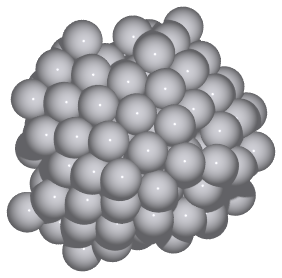

In [8]:
import numpy as np

# Assuming Pt_3nm is an array-like object of atoms
num_atoms_to_remove = len(Pt_3nm) // 3  # Integer division to get a third of the number of atoms
random_indices = np.random.choice([atom.index for atom in Pt_3nm], num_atoms_to_remove, replace=False)
temp = Pt_3nm.copy()
del temp[random_indices]
temp.calc = calculator
E_temp_3nm = get_opt_energy(temp)
render_and_display_np(temp, './output/ini', (1000, 1000))


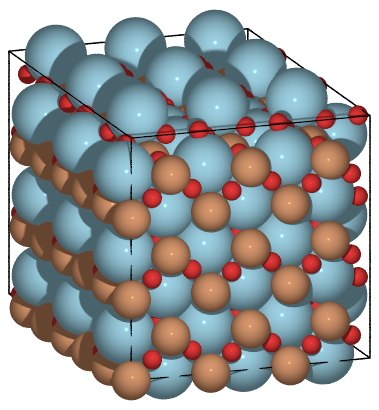

In [9]:
from ase.io.vasp import read_vasp
lfo = read_vasp("CONTCAR")
repeat=(3,3,3)
atoms = lfo.repeat(repeat)
atoms.set_pbc((False, False, False))  # Set PBC to None
#atoms.cell = None  # Set cell dimensions to None
render_and_display_np(atoms,'./output/ini',(1000, 1000))


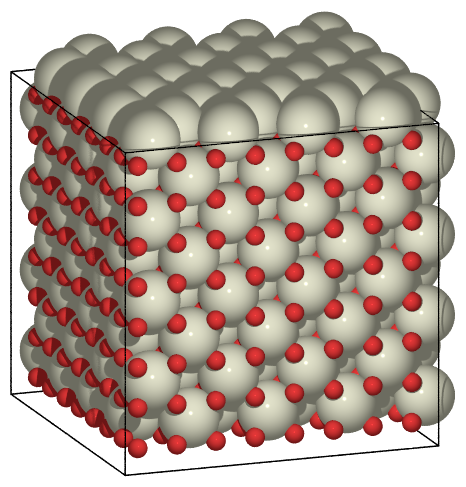

In [10]:
from ase.io.vasp import read_vasp
lfo = read_vasp("POSCAR.vasp")
repeat=(2,2,2)
atoms = lfo.repeat(repeat)
#atoms.cell = None  # Set cell dimensions to None
render_and_display_np(atoms,'./output/ini',(1000, 1000))


In [10]:
!pip install pymatgen

Looking in indexes: https://pypi.matlantis-common.svc:8080/simple
You should consider upgrading via the '/home/jovyan/.py38/bin/python -m pip install --upgrade pip' command.


In [18]:
!pip3 install acat

Looking in indexes: https://pypi.matlantis-common.svc:8080/simple
You should consider upgrading via the '/home/jovyan/.py38/bin/python -m pip install --upgrade pip' command.


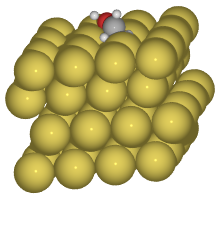

In [19]:
from acat.adsorption_sites import SlabAdsorptionSites
from acat.adsorption_sites import get_adsorption_site
from acat.build import add_adsorbate_to_site
from acat.utilities import get_mic
from ase.build import fcc111
from ase.visualize import view
atoms = fcc111('Au', (4, 4, 4), vacuum=5.)
i, site = get_adsorption_site(atoms, indices=(54, 57, 58),
                              surface='fcc111',
                              return_index=True)
sas = SlabAdsorptionSites(atoms, surface='fcc111')
sites = sas.get_sites()
nbsites = sas.get_neighbor_site_list(neighbor_number=1)
nbsite = sites[nbsites[i][0]] # Choose the first neighbor site

ori = get_mic(site['position'], nbsite['position'], atoms.cell)

add_adsorbate_to_site(atoms, adsorbate='CH3OH', site=site,
                      orientation=ori)
atoms.cell = None  # Set cell dimensions to None
render_and_display_np(atoms,'./output/ini',(5000, 5000))


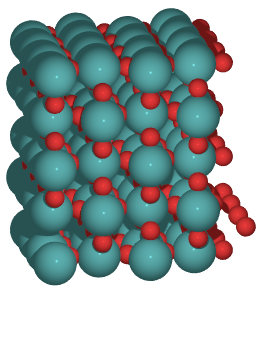

In [49]:
from acat.adsorbate_coverage import SlabAdsorbateCoverage
from acat.build import add_adsorbate_to_site
from acat import settings
from ase.spacegroup import crystal
from ase.build import surface
from collections import Counter

a, c = 4.584, 2.953
rutile = crystal(['Ru', 'O'], basis=[(0, 0, 0), (0.3, 0.3, 0)],
                 spacegroup=136, cellpar=[a, a, c, 90, 90, 90])
rutile_110_atoms = surface(rutile, (1,1,0), layers=5)
# Remove the oxygens above the top surface
indices = [a.index for a in rutile_110_atoms if a.position[2] < 14.]
rutile_110_atoms = rutile_110_atoms[indices]
rutile_110_atoms.center(vacuum=5., axis=2)
rutile_110_atoms *= (2,4,1)
repeat=(1,1,1)
atoms = rutile_110_atoms.repeat(repeat)
atoms.cell = None  # Set cell dimensions to None
render_and_display_np(atoms,'./output/ini',(5000, 5000))



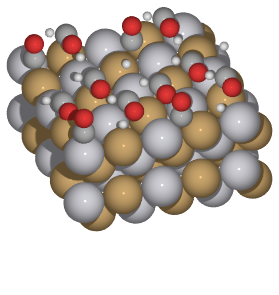

In [141]:
from acat.build.adlayer import OrderedPatternGenerator as OPG
from acat.adsorption_sites import SlabAdsorptionSites
from ase.io import read
from ase.build import fcc100
from ase.visualize import view
atoms = fcc100('Pt', (5, 5, 4), vacuum=5.)
for atom in atoms:
    if atom.index % 2 == 0:
        atom.symbol = 'Cu'
atoms.center(axis=2)
diagonal_vec = atoms[78].position - atoms[48].position
sas = SlabAdsorptionSites(atoms, surface='fcc100',
                          allow_6fold=False,
                          surrogate_metal='Ni')
opg = OPG(atoms, adsorbate_species=['CO','H','HCO'],
          surface='fcc100',
          sorting_vector=diagonal_vec,
          adsorption_sites=sas,
          remove_site_shells=2)
opg.run(max_gen=5, unique=True)
images = read('patterns.traj', index=':')
repeat=(1,1,1)
atoms = images[3].repeat(repeat)
atoms.cell = None  # Set cell dimensions to None
render_and_display_np(atoms,'./output/ini',(1000, 1000))

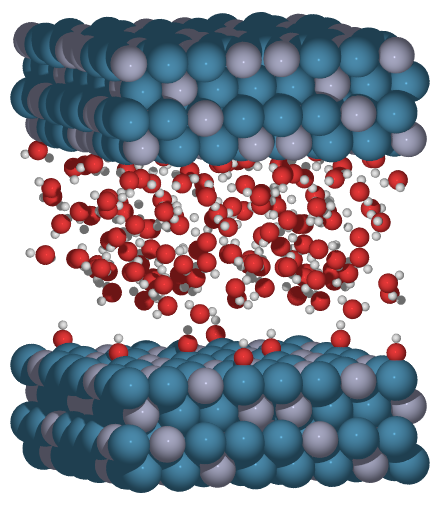

In [73]:
from acat.build.adlayer import RandomPatternGenerator as RPG
from acat.adsorption_sites import SlabAdsorptionSites
from ase.io import read
from ase.build import fcc100
from ase.visualize import view
water_bulk = read('water_bulk.xyz')
water_bulk.center(vacuum=11., axis=2)
slab = fcc100('Ir', (4, 4, 8), vacuum=8, periodic=True)
for atom in slab:
    if atom.index % 3 == 0:
        atom.symbol = 'Zn'
slab.translate(-slab.cell[2] / 2 )
slab.wrap()
atoms = slab + water_bulk
sas = SlabAdsorptionSites(atoms, surface='fcc100',
                          composition_effect=True,
                          both_sides=True,
                          surrogate_metal='Ni')
rpg = RPG(atoms, adsorbate_species=['H','OH','OH2'],
          species_probabilities={'H': 0.2, 'OH': 0.7, 'OH2': 0.1},
          min_adsorbate_distance=1,
          adsorption_sites=sas,
          surface='fcc100')

rpg.run(num_gen=1, action='add', num_act=4, unique=True)
images = read('patterns.traj', index=':')
repeat=(2,2,1)
atoms = images[0].repeat(repeat)
atoms.cell = None  # Set cell dimensions to None
render_and_display_np(atoms,'./output/ini',(1000, 1000))

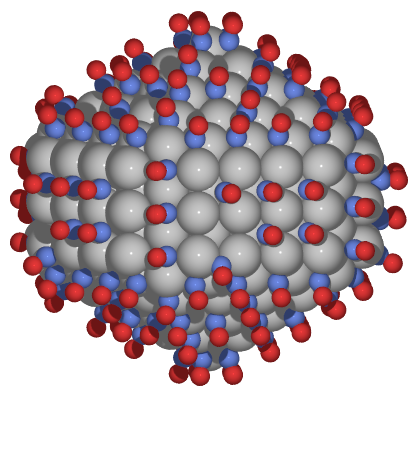

In [88]:
from acat.build.adlayer import special_coverage_pattern
from acat.build import remove_adsorbates_too_close
from ase.cluster import Decahedron
from ase.visualize import view
atoms = Decahedron('Ag', p=4, q=3, r=1)
atoms.center(vacuum=5.)
pattern = special_coverage_pattern(atoms, adsorbate_species='NO',
                                   coverage=0.75)
remove_adsorbates_too_close(pattern, min_adsorbate_distance=1.)
pattern.cell = None  # Set cell dimensions to None
render_and_display_np(pattern,'./output/ini',(1000, 1000))

 ['PH3', 'P2', 'CH3CHO', 'H2COH', 'CS', 'OCHCHO', 'C3H9C', 'CH3COF',
    'CH3CH2OCH3', 'HCOOH', 'HCCl3', 'HOCl', 'H2', 'SH2', 'C2H2',
    'C4H4NH', 'CH3SCH3', 'SiH2_s3B1d', 'CH3SH', 'CH3CO', 'CO', 'ClF3',
    'SiH4', 'C2H6CHOH', 'CH2NHCH2', 'isobutene', 'HCO', 'bicyclobutane',
    'LiF', 'Si', 'C2H6', 'CN', 'ClNO', 'S', 'SiF4', 'H3CNH2',
    'methylenecyclopropane', 'CH3CH2OH', 'F', 'NaCl', 'CH3Cl',
    'CH3SiH3', 'AlF3', 'C2H3', 'ClF', 'PF3', 'PH2', 'CH3CN',
    'cyclobutene', 'CH3ONO', 'SiH3', 'C3H6_D3h', 'CO2', 'NO',
    'trans-butane', 'H2CCHCl', 'LiH', 'NH2', 'CH', 'CH2OCH2',
    'C6H6', 'CH3CONH2', 'cyclobutane', 'H2CCHCN', 'butadiene', 'C',
    'H2CO', 'CH3COOH', 'HCF3', 'CH3S', 'CS2', 'SiH2_s1A1d', 'C4H4S',
    'N2H4', 'OH', 'CH3OCH3', 'C5H5N', 'H2O', 'HCl', 'CH2_s1A1d',
    'CH3CH2SH', 'CH3NO2', 'Cl', 'Be', 'BCl3', 'C4H4O', 'Al', 'CH3O',
    'CH3OH', 'C3H7Cl', 'isobutane', 'Na', 'CCl4', 'CH3CH2O', 'H2CCHF',
    'C3H7', 'CH3', 'O3', 'P', 'C2H4', 'NCCN', 'S2', 'AlCl3', 'SiCl4',
    'SiO', 'C3H4_D2d', 'H', 'COF2', '2-butyne', 'C2H5', 'BF3', 'N2O',
    'F2O', 'SO2', 'H2CCl2', 'CF3CN', 'HCN', 'C2H6NH', 'OCS', 'B', 'ClO',
    'C3H8', 'HF', 'O2', 'SO', 'NH', 'C2F4', 'NF3', 'CH2_s3B1d',
    '', 'CH3COCl', 'NH3', 'C3H9N', 'CF4', 'C3H6_Cs', 'Si2H6',
    'HCOOCH3', 'O', 'CCH', 'N', 'Si2', 'C2H6SO', 'C5H8', 'H2CF2', 'Li2',
    'CH2SCH2', 'C2Cl4', 'C3H4_C3v', 'CH3COCH3', 'F2', 'CH4', 'SH',
    'H2CCO', 'CH3CH2NH2', 'Li', 'N2', 'Cl2', 'H2O2', 'Na2', 'BeH',
    'C3H4_C2v', 'NO2']

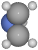

In [109]:
from ase.build import molecule
atoms = molecule('CH2NHCH2')
render_and_display_np(atoms,'./output/ini',(1000, 1000))

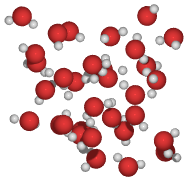

In [82]:
hi = read('water_bulk.xyz')
hi.cell = None  # Set cell dimensions to None

render_and_display_np(hi,'./output/ini',(1000, 1000))

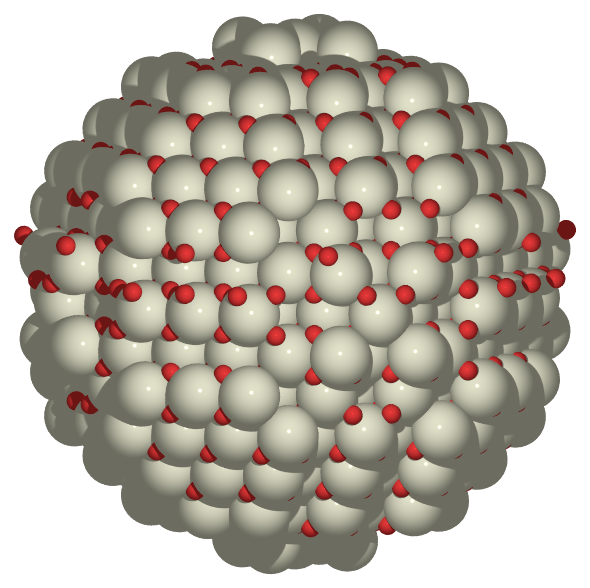

In [87]:
hi = read('CeO2_s_17.xyz')
hi.cell = None  # Set cell dimensions to None
render_and_display_np(hi,'./output/ini',(1000, 1000))

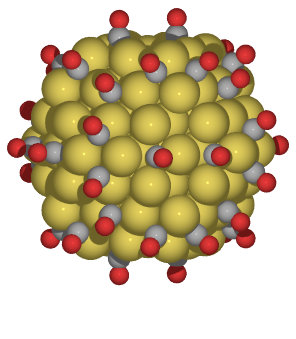

In [85]:
from acat.build.adlayer import special_coverage_pattern as scp
from ase.cluster import Octahedron
from ase.visualize import view
atoms = Octahedron('Au', length=6, cutoff=2)
atoms.center(vacuum=5.)
pattern = scp(atoms, adsorbate_species='CO', coverage=0.5)
pattern.cell = None  # Set cell dimensions to None
render_and_display_np(pattern,'./output/ini',(1000, 1000))

In [28]:
# Generate slab
from ase.build import make_supercell
import numpy as np
from pymatgen.core.surface import SlabGenerator
from pymatgen.io.ase import AseAtomsAdaptor
from ase.constraints import FixAtoms

slab_gen = SlabGenerator(
    initial_structure=AseAtomsAdaptor.get_structure(lfo),
    miller_index=[1,0,0],
    min_slab_size=20.0, # 
    min_vacuum_size=60.0, # nanoparticle
    lll_reduce=False,
    center_slab=True,
    primitive=True,
    max_normal_search=1,
)
slabs = slab_gen.get_slabs(tol=0.3, bonds=None, max_broken_bonds=0, symmetrize=False)

ValueError: pov-format can only store 1 Atoms object.

The resulting `slabs` are pymatgen instances. 
It can be converted to an ASE `Atoms` instance using `AseAtomsAdaptor`.

The obtained structure is converted to ASE `Atoms` and visualized.

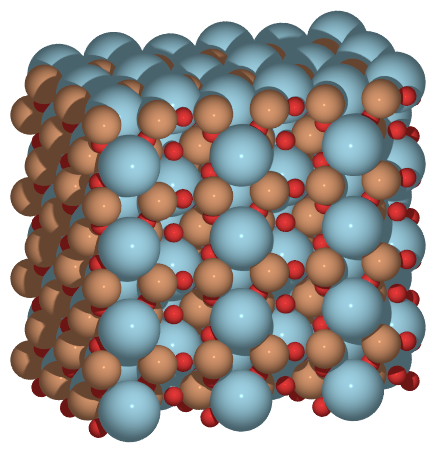

In [31]:
slab_atoms_list = [AseAtomsAdaptor.get_atoms(slab) for slab in slabs]
slab = slab_atoms_list[1].copy()

# make supercell: expand to xy-plane
#slab = make_supercell(slab, [[4, 0, 0], [0, 2, 0], [0, 0, 1]])  # this is same with below.
#slab = slab * (8, 8, 1)
slab = slab * (3, 3, 1)

# shift `slab` to bottom of cell
min_pos_z = np.min(slab.positions, axis=0)[2]
slab.set_positions(slab.positions - [0, 0, min_pos_z])
slab.cell = None  # Set cell dimensions to None
render_and_display_np(slab,'./output/ini',(1000, 1000))



Next, we create Pt doped LFO

In [15]:
from ase.data import atomic_numbers
import numpy as np

numbers = slab.get_atomic_numbers()
fe_index=[]
for atom in slab: 
 if atom.symbol=='Fe':
    fe_index.append(atom.index)
print(len(fe_index))
replace_index=[]
replace_fe_index = np.random.choice(np.arange(len(fe_index)), size=int(len(fe_index)*0.1), replace=False)
for i in replace_fe_index:
    replace_index.append(fe_index[i])
print(f"Replace {replace_index} atom")
numbers[replace_index] = atomic_numbers['Pt']
slab.set_atomic_numbers(numbers)
slab

1024
Replace [1940, 3882, 4560, 4543, 3603, 4022, 3221, 1263, 382, 1801, 1220, 4600, 2082, 4260, 2302, 1641, 1022, 4542, 4323, 1340, 3800, 1741, 3540, 2200, 3883, 2483, 322, 403, 541, 1260, 2962, 1942, 4180, 4003, 4720, 343, 5000, 742, 641, 1301, 963, 4540, 3503, 82, 702, 4340, 3020, 2680, 4680, 2682, 1981, 3203, 4640, 2143, 1060, 1762, 81, 1080, 3582, 3761, 2761, 402, 3000, 3323, 3040, 1141, 4443, 3362, 2762, 1681, 3460, 880, 3360, 3702, 381, 3142, 3041, 281, 4842, 1563, 4561, 1381, 881, 860, 1183, 1523, 2823, 2863, 4242, 841, 2921, 2321, 2480, 1702, 3102, 2340, 2003, 1121, 1803, 2843, 3721, 163] atom


Atoms(symbols='Fe922La1024O3072Pt102', pbc=True, cell=[[63.52, 0.0, 3.889478234091994e-15], [7.178659508156505e-15, 44.64, 2.7334116556968924e-15], [0.0, 0.0, 84.75]], bulk_equivalent=..., bulk_wyckoff=...)

In [111]:
from copy import deepcopy

# cut cluster to make half-sphere
cluster = Pt_3nm.copy()
# Rotate cluster to make triangle surface comes to top.
cluster.rotate([0, 0, 1], [1, 1, 1], center=cluster.get_center_of_mass())

Pt_cut_NPs = []

for i in range(9):
    # Make a copy of the cluster
    cluster_copy = deepcopy(cluster)
    
    # Cut the bottom i layers
    for _ in range(i):
        target = np.round(cluster_copy.positions, decimals=0)
        del cluster_copy[np.where(target[:,2]==np.min(target[:,2]))[0]]
    
    # Add the cut cluster to the list
    Pt_cut_NPs.append(cluster_copy)
    #render_and_display_np(cluster_copy,'./output/ini',(50, 50))




In [112]:
from ase.data import atomic_numbers, chemical_symbols, covalent_radii
from ase.build import make_supercell
from scipy.spatial import cKDTree
from scipy.spatial.distance import pdist, squareform
from collections import Counter
from functools import reduce
import math

def gcd_of_list(numbers):
    return reduce(math.gcd, numbers)

gcd = gcd_of_list(list(element_counts.values()))
def create_socketed_system(support, cluster, cutoff_distance):
    # Position the cluster on the support
    slab_xy_size = np.min(support.cell.cellpar()[0:2])
    cluster_xy_size = np.max((np.max(cluster.positions, axis=0) - np.min(cluster.positions, axis=0))[0:2] )
    min_slab_xy_size = cluster_xy_size + 5
    for i in range(1, 5):
        if slab_xy_size * i < min_slab_xy_size:
            pass
        else:
            support_sc = make_supercell(support, [[i, 0, 0], [0, i, 0], [0, 0, 1]])
            break
    slab_surface_xy_center = np.append(support_sc.cell.cellpar()[0:2] / 2, np.max(support_sc.positions, axis=0)[2])
    cluster_surface_xy_center = np.append(np.mean(cluster.positions, axis=0)[0:2], np.min(cluster.positions, axis=0)[2])
    cluster = Atoms(cluster.get_chemical_symbols(), cluster.positions - cluster_surface_xy_center)
    slab_surface_covalent_radii = covalent_radii[support_sc.get_atomic_numbers()[np.argmax(support_sc.positions, axis=0)[2]]]
    cluster_surface_covalent_radii = covalent_radii[cluster.get_atomic_numbers()[np.argmin(cluster.positions, axis=0)[2]]]
    cluster.translate(slab_surface_xy_center + [0, 0, slab_surface_covalent_radii + cluster_surface_covalent_radii])
    
    # Apply depth_cutoff by translating the nanoparticle into the support along the z-axis
    cluster.translate([0, 0, -depth_cutoff])

    indices_to_remove = []
    pt_cluster_positions = np.round(cluster.positions, decimals=0)
    bottom_layer_z = np.min(pt_cluster_positions[:, 2])
    bottom_layer_indices = np.where(pt_cluster_positions[:, 2] == bottom_layer_z)[0]
    bottom_layer_atoms = cluster[bottom_layer_indices]
    
    #cluster를 support아래로 내린다.
    support_positions = np.round(support_sc.positions, decimals=0)
    top_layer_cutoff = bottom_layer_z - cutoff_distance
    top_layer_indices = np.where(support_positions[:, 2] >= top_layer_cutoff)[0]
    top_layer_atoms = support_sc[top_layer_indices]

    support_tree = cKDTree(top_layer_atoms.positions)

    for pt_atom in bottom_layer_atoms:
        distances, indices = support_tree.query(pt_atom.position, k=1, distance_upper_bound=cutoff_distance)
        if np.isfinite(distances):
            indices_to_remove.append(top_layer_indices[indices])

    socketed_support = support_sc.copy()
    unique_indices_to_remove = np.unique(indices_to_remove).astype(int)
    del socketed_support[unique_indices_to_remove]
    
       # Lower the Pt cluster by the amount of support that is deleted
    if indices_to_remove:
        min_deleted_z = np.min(support_sc.positions[np.unique(indices_to_remove)][:, 2])
        max_socketed_z = np.max(socketed_support.positions[:, 2])
        delta_z = min_deleted_z - max_socketed_z - cluster_surface_covalent_radii
        cluster.translate([0, 0, +delta_z])

    socketed_system = socketed_support + cluster

    # Check for overlapping atoms and delete them
    min_distance = 2 #this number has to be changed
    distance_matrix = squareform(pdist(socketed_system.positions))
    np.fill_diagonal(distance_matrix, float("inf"))
    overlapping_indices = np.where(distance_matrix < min_distance)
    # Identify unique overlapping atoms to delete
    atoms_to_delete = np.unique(np.concatenate(overlapping_indices))
    # Delete overlapping atoms
    socketed_system_result = socketed_system.copy()
    del socketed_system_result[atoms_to_delete]
    #print(atoms_to_delete)
    
    # Create kd-trees for the positions of atoms in support_sc and socketed_support
    tree_support_sc = cKDTree(socketed_system.positions)
    tree_socketed_support = cKDTree(socketed_system_result.positions)
    # Find atoms in support_sc that have no counterpart in socketed_support
    dists, indices = tree_socketed_support.query(support_sc.positions, k=1)
    missing_atom_indices = np.where(dists > 1e-8)[0]  # Use a small threshold to account for floating-point inaccuracies
    # Create a new Atoms object for deleted_atoms from the missing atoms in support_sc
    deleted_atoms = support_sc[missing_atom_indices]
    print(len(missing_atom_indices), len(deleted_atoms))

    # Check if there are still any overlapping atoms
    distance_matrix = squareform(pdist(socketed_system_result.positions))

    np.fill_diagonal(distance_matrix, float("inf"))
    if np.min(distance_matrix) < min_distance:
        print("Warning: Atoms are still closer than 1.5 Å in the socketed_system structure after deletion.")

    return socketed_system_result, socketed_support, deleted_atoms,cluster

socketed_systems = []
socketed_supports = []
deleted_systems = []
quality = (1000, 1000)
depth_cutoffs = np.linspace(0, 6, num=6)
pt_indices = [0]

support = slab.copy()
for pt_index in pt_indices:
    for i, depth_cutoff in enumerate(depth_cutoffs):
        print(f"Generating structures for Pt_cut_NPs[{pt_index}]: {i+1}/{len(depth_cutoffs)}")
        print(f"Creating socketed_system with depth cutoff {depth_cutoff:.2f} Å...")
        socketed_system, socketed_support, deleted_system, cluster = create_socketed_system(support, Pt_cut_NPs[pt_index], depth_cutoff)
        socketed_systems.append(socketed_system)
        socketed_supports.append(socketed_support)
        deleted_systems.append(deleted_system)
        # Save and display the rendered socketed_system and socketed_support
        output_path_socketed_system = f'./output/socket_depth_{depth_cutoff:.2f}_Pt_cut_NPs_{pt_index}'
        output_path_socketed_support = f'./output/socket_depth_{depth_cutoff:.2f}_support_Pt_cut_NPs_{pt_index}'
        output_path_deleted_system = f'./output/socket_depth_{depth_cutoffs[i]:.2f}_deleted_Pt_cut_NPs_{pt_index}'
        #render_and_display_np(deleted_system, output_path_deleted_system, quality)
        #render_and_display_np(socketed_support, output_path_socketed_support, quality)
        render_and_display_np(socketed_system, output_path_socketed_system, quality)
        name = socketed_system.symbols
        # Get the symbols as a string
        symbols = deleted_system.get_chemical_symbols()
        # Count the occurrences of each element
        element_counts = Counter(symbols)
        # Print the results
        element_counts_line = ', '.join(f"{element}: {count}" for element, count in element_counts.items())
        print(element_counts_line)
        # Calculate the ratios
        pt_fe_count = element_counts.get('Pt', 0) + element_counts.get('Fe', 0)
        la_count = element_counts.get('La', 0)
        o_count = element_counts.get('O', 0)
        # Normalization by 'La'
        norm_pt_fe_count = pt_fe_count / la_count if la_count else 0
        norm_o_count = o_count / la_count if la_count else 0
        print(f"Normalized Ratios: La:Pt+Fe:O = 1:{norm_pt_fe_count}:{norm_o_count}")

        


NameError: name 'element_counts' is not defined

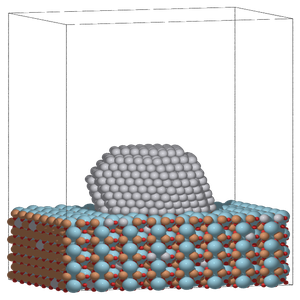

In [21]:
render_and_display_np(socketed_systems[3],'./output/ini',(300, 300))

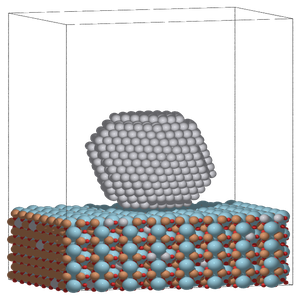

In [23]:
render_and_display_np(socketed_systems[0],'./output/ini',(300, 300))

In [22]:
from ase.constraints import FixAtoms

mask=socketed_systems[3].positions[:, 2] < 5.0
c = FixAtoms(mask=mask)
socketed_systems[3].set_constraint(c)

# supported

In [ ]:
import pfp_api_client
from pfp_api_client.pfp.calculators.ase_calculator import ASECalculator
from pfp_api_client.pfp.estimator import Estimator, EstimatorCalcMode
from ase.optimize import BFGS, LBFGS, FIRE
from ase.io import Trajectory
'''
supported_dft_opt=supported.copy()
supported_dft_opt.calc = calculator
traj = Trajectory("./supported_dft_opt.traj", "w", supported)
opt = FIRE(supported_dft_opt)
opt.attach(traj.write, interval=10)
opt.run(fmax=0.05)
traj.close()
traje=read("./supported_dft_opt.traj")
len(traje)
render_and_display_np(traje,'./output/ini',(300, 300))
'''

In [ ]:
from pfp_api_client.pfp.estimator import Estimator, EstimatorCalcMode
from pfp_api_client.pfp.calculators.ase_calculator import ASECalculator
import ase
from ase.md.velocitydistribution import MaxwellBoltzmannDistribution
from ase.md.langevin import Langevin
from ase.md import MDLogger
from ase import units
from time import perf_counter

# Set up a crystal
atoms = socketed_systems[3]
atoms.pbc=True
print("atoms = ",atoms)
atoms.calc = calculator

# input parameters
time_step    = 1.0    # fsec
temperature  = 773    # Kelvin
num_md_steps = 100000     # Total MD step, for testing.
num_interval = 1000      # Output printing interval
friction_coeff = 0.002
print(f"friction_coeff = {friction_coeff:.3f}")

# Define output filenames
output_filename = "./output/md_opt_0506_socketed_systems3"
print("output_filename = ",output_filename)
log_filename = output_filename + ".log"
print("log_filename = ",log_filename)
traj_filename = output_filename + ".traj"
print("traj_filename = ",traj_filename)

# run MD
dyn = Langevin(atoms, time_step*units.fs, friction=friction_coeff, temperature_K=temperature, loginterval=num_interval, trajectory=traj_filename)
    
# Print statements
def print_dyn():
    imd = dyn.get_number_of_steps()
    etot  = atoms.get_total_energy()
    temp_K = atoms.get_temperature()
    stress = atoms.get_stress(include_ideal_gas=True)/units.GPa
    stress_ave = (stress[0]+stress[1]+stress[2])/3.0 
    elapsed_time = perf_counter() - start_time
    print(f"  {imd: >3}   {etot:.3f}    {temp_K:.2f}    {stress_ave:.2f}  {stress[0]:.2f}  {stress[1]:.2f}  {stress[2]:.2f}  {stress[3]:.2f}  {stress[4]:.2f}  {stress[5]:.2f}    {elapsed_time:.3f}")


dyn.attach(print_dyn, interval=num_interval)
dyn.attach(MDLogger(dyn, atoms, log_filename, header=True, stress=True, peratom=True, mode="w"), interval=num_interval)

# Now run the dynamics
start_time = perf_counter()
print(f"    imd     Etot(eV)    T(K)    stress(mean,xx,yy,zz,yz,xz,xy)(GPa)  elapsed_time(sec)")
dyn.run(num_md_steps)

atoms =  Atoms(symbols='Fe837La930O2836Pt1022', pbc=True, cell=[63.52, 44.64, 84.75], constraint=FixAtoms(indices=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 410, 411, 412, 413, 414, 415, 416, 417, 418, 419, 480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 490, 491, 492, 493, 494, 495, 496, 497, 498, 499, 560, 561, 562, 563, 564, 565, 566, 567, 568, 569, 570, 571, 572, 573, 574, 575, 576, 577, 578, 579, 640, 641, 642, 643, 644, 645, 646, 647, 648, 649, 650, 651, 652, 653, 654, 655, 656, 657, 658, 659, 720, 721, 722, 723, 724, 725, 726, 

<span id="papermill-error-cell" style="color:red; font-family:Helvetica Neue, Helvetica, Arial, sans-serif; font-size:2em;">Execution using papermill encountered an exception here and stopped:</span>

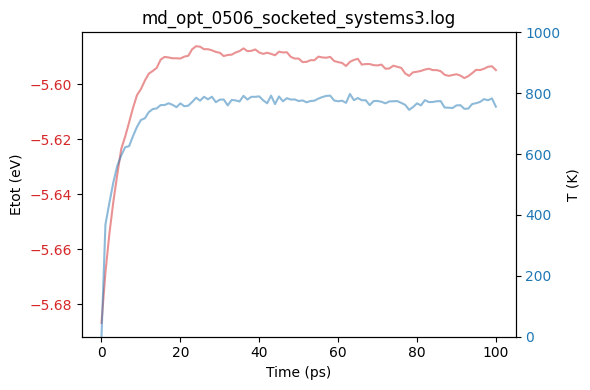

In [21]:
import numpy as np
import matplotlib.pyplot as plt

def parse_log_file(filename):
    with open(filename, "r") as file:
        lines = file.readlines()

    runs = []
    run_data = []
    for line in lines:
        if "Time[ps]" in line:
            if run_data:
                runs.append(run_data)
                run_data = []
        else:
            try:
                tokens = line.split()
                time, etot, temp = float(tokens[0]), float(tokens[1]), float(tokens[4])
                run_data.append((time, etot, temp))
            except (ValueError, IndexError):
                pass

    runs.append(run_data)
    return runs

log_filename = ("./output/md_opt_0506_socketed_systems3.log")  # Replace this with your log file name

fig, ax1 = plt.subplots(figsize=(6, 4))

log_data = parse_log_file(log_filename)
last_run_data = log_data[-1]

time = [row[0] for row in last_run_data]
etot = [row[1] for row in last_run_data]
temp = [row[2] for row in last_run_data]

ax1.plot(time, etot, color='tab:red', alpha=0.5)
ax2 = ax1.twinx()
ax2.plot(time, temp, color='tab:blue', alpha=0.5)

ax2.set_ylim(0, 1000)

ax1.set_title(log_filename.split('/')[-1])
ax1.tick_params(axis='y', labelcolor='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:blue')

ax1.set_ylabel('Etot (eV)')
ax1.set_xlabel('Time (ps)')
ax2.set_ylabel('T (K)')

fig.tight_layout()
plt.show()


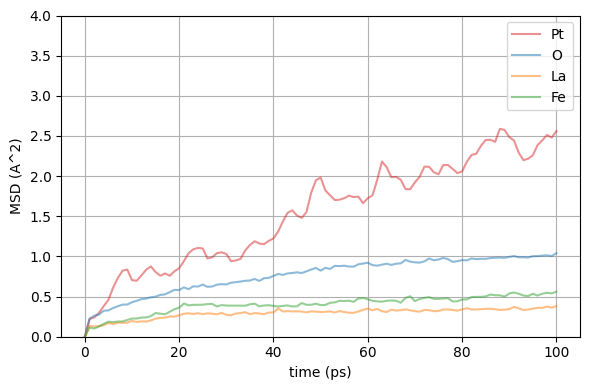

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ase.io import Trajectory

def get_positions(traj, element):
    element_indices = [i for i, x in enumerate(traj[0].get_chemical_symbols()) if x == element]
    positions_all = np.array([traj[i].get_positions() for i in range(len(traj))])
    positions = positions_all[:, element_indices]
    return positions

def calculate_msd(positions):
    msd = np.mean(np.sum((positions - positions[0]) ** 2, axis=2), axis=1)
    return msd

def plot_total_msd(ax, msd, label, color):
    time = np.arange(len(msd)) 
    ax.plot(time, msd, label=label, color=color, alpha=0.5)

traj_filename = "./output/md_opt_0506_socketed_systems3.traj"
traj = Trajectory(traj_filename)

elements = ['Pt', 'O', 'La', 'Fe']
colors = ['tab:red', 'tab:blue', 'tab:orange', 'tab:green']
positions_list = [get_positions(traj, element) for element in elements]
msd_list = [calculate_msd(positions) for positions in positions_list]

fig, ax = plt.subplots(figsize=(6, 4))

for i in range(len(elements)):
    plot_total_msd(ax, msd_list[i], elements[i], colors[i])

ax.grid(True)
ax.set_xlabel("time (ps)")
ax.set_ylabel("MSD (A^2)")
ax.legend()
ax.set_ylim(0, 4)
plt.tight_layout()
plt.show()


101
simulation time_0ps


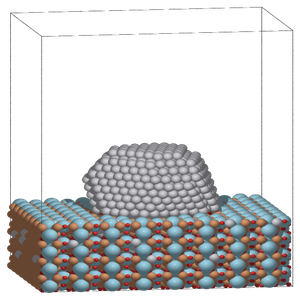

simulation time_50ps


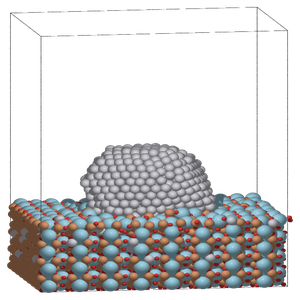

simulation time_100ps


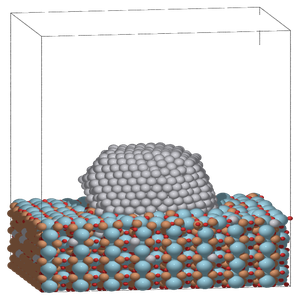

In [2]:
from PIL import Image
from IPython.display import display as ipy_display
from ase import Atoms
from ase.build import fcc111, add_adsorbate, bulk
from ase.io import read, write
from PIL import Image
from IPython.display import display

def render_and_display(nano, filename, max_size=(300, 300)):
    renderer = write(filename + '.pov', nano, rotation='10z,-80x')
    renderer.render()
    image_path = './' + filename + '.png'
    img = Image.open(image_path)
    img.thumbnail(max_size, Image.LANCZOS)
    ipy_display(img)
    
imd = len(traj)
print(imd)
for i in [0, int(imd/2), imd-1]:
    print(f"simulation time_{i}ps")
    render_and_display(traj[i],'hi', (300, 300))
